# Exercise #2: Auditing Node Rankings in Directed Networks

## Overview

In this exercise, we will explore how network structure, particularly the mechanisms of edge formation, impacts node ranking algorithms. Node rankings help determine the importance or relevance of nodes in a network, with applications ranging from social networks to citation networks. We will specifically focus on **PageRank**, a widely used algorithm for ranking nodes based on their centrality.

Our goal is to audit how **majority** and **minority** groups are represented in the top-k rankings of PageRank. A real-world example of this issue is the ranking of scholars based on citation or collaboration networks. For instance, how do men and women rank in the top-k of a PageRank algorithm, and how does this compare to their overall representation in the population?

### Key Concepts:
1. **Node Ranking**: Ranking nodes based on their importance using algorithms like degree centrality or PageRank.
2. **Disparity**: The relationship between inequality (distribution of rankings) and inequity (representation of minority nodes in the top-k rankings).
    a. **Inequality**: Measured by the Gini coefficient of the PageRank distribution.
    b. **Inequity**: The representation of minority nodes in the top-k.

We will use the **DPAHModel** to generate multiple synthetic directed networks and calculate **disparity scores** (inequality and inequity) to understand how these networks treat minority nodes in comparison to majority nodes.

This approach was published in [Espín-Noboa et al. (2022)](https://www.nature.com/articles/s41598-022-05434-1) in *Nature Scientific Reports*.

## Task

1. **Generate Synthetic Networks**: Use the `DPAHModel` to create multiple synthetic directed networks with varying parameters.
2. **Compute centrality metrics**: Rank the nodes in each network using a centrality metric e.g., the PageRank algorithm.
3. **Get to know your data visually!**: Plot the types of edges and degree distribution to see any patterns given the characteristics of the network.
4. **Compute Disparity Scores**:
   - Calculate the **Gini coefficient** of the PageRank distribution to measure **inequality**.
   - Analyze the **representation** of minority nodes in the top-k PageRank rankings to measure **inequity**.
5. **Plot and Compare**: Visualize the disparity scores across the networks to see how inequality and inequity vary based on network structure.

## Instructions

1. Use the provided function to generate networks using the `DPAHModel`.
2. Use a centrality metric of nodes, e.g., `pagerank` or `in_degree` for each network.
3. Use the built-in function to compute the inequality (Gini coefficient) of the PageRank distribution.
4. Use another built-in function to compute the inequity (ME: mean error) of the representation of minority nodes in top-k ranks.
5. Plot the disparity scores (inequality and inequity) for comparison.
6. BONUS: Disentangle the effects of homophily, preferential attachment, and directed links.

## Expected Outcome

By the end of this exercise, you will have a deeper understanding of how different network structures influence node rankings, and how inequality and inequity manifest in these rankings. You will also learn to audit algorithmic outcomes in the context of network science.

___

In [1]:
# ### If running this on Google Colab, run the following lines:
# import os
# !pip install netin==2.0.0a1
# !wget -nc https://raw.githubusercontent.com/snma-tutorial/ecmlpkdd2024/main/exercises/helper.py
# !mkdir plots
# os.kill(os.getpid(), 9)

In [ ]:
# ### If running this on Google Colab, run the following line:
# !pip install networkx==3.2.1

## Dependencies

In [2]:
## Directed Network models
from netin.models import DPAModel
from netin.models import DHModel
from netin.models import DPAHModel

In [3]:
## Utils
from netin import viz
from netin.utils import io
from netin.stats import ranking 
from netin.stats import distributions
from netin.utils import constants as const
from netin.stats import networks

In [4]:
import pandas as pd

In [5]:
## Helper with additional functions
%load_ext autoreload
%autoreload 2

import helper

## Constants

In [6]:
PLOTS = 'plots/'     # where to store the plots
EXID = 2                # exercise id to name the plot files
io.validate_dir(PLOTS)

True

## Task 1. Generate Synthetic Directed Graphs

In [7]:
### Fix some parameters of the networks

N = 1000     # number of nodes
d = 0.003    # number of edges to attach to every source node
             # Hint: Remember that the final number of edges will be: e = d * n (n-1)
f_m = 0.1    # fraction of minority group
plo_M = 2.1  # powerlaw out_degree exponent of the majority group (activity)
plo_m = 2.1  # powerlaw out_degree exponent of the minority group (activity)
seed = 12345 # random seed (reproducibility)

In [8]:
# DPAH graphs:
# Homophilic h > 0.5
# Neutral h = 0.5
# Heterophilic h < 0.5

homophily_values = [0.1, 0.5, 0.9]
graph_models = []

for h_M in homophily_values: # homophily within majority nodes
    for h_m in homophily_values: # homophily within minority nodes

        # generating graph
        m = DPAHModel(N=N, d=d, f_m=f_m, plo_M=plo_M, plo_m=plo_m, h_M=h_M, h_m=h_m, seed=seed)
        m.simulate()

        # updating name to include homophily values
        graph_models.append(m)

## Task 2. Compute Centrality metrics

In [9]:
# generating node metadata dataframe
metadata = []
for m in graph_models:
    df = networks.get_node_metadata_as_dataframe(m.graph)
    df.name = helper.get_title(df, m.SHORT, m.f_m, m.h_M, m.h_m)
    metadata.append(df)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

In [10]:
# Inspect the content of the graph's metadata
metadata[0].head()

,node,class_label,real_label,degree,in_degree,out_degree,clustering,betweenness,closeness,eigenvector,pagerank,degree_rank,in_degree_rank,out_degree_rank,clustering_rank,betweenness_rank,closeness_rank,eigenvector_rank,pagerank_rank
0,0,0,M,NaN,2,3,0.555556,0.0,0.249646,3.319525e-02,0.000547,NaN,0.947368,0.892857,0.107143,1.0,0.774510,0.165525,0.895349
1,1,0,M,NaN,0,0,0.000000,0.0,0.000000,1.147827e-20,0.000248,NaN,1.000000,1.000000,1.000000,1.0,1.000000,0.576484,1.000000
2,2,0,M,NaN,0,3,0.333333,0.0,0.000000,-1.227646e-17,0.000248,NaN,1.000000,0.892857,0.446429,1.0,1.000000,0.950913,1.000000
3,3,0,M,NaN,1,1,0.500000,0.0,0.001001,-1.392217e-17,0.000249,NaN,0.973684,0.964286,0.148810,1.0,0.990196,0.987443,0.994186
4,4,0,M,NaN,0,0,0.000000,0.0,0.000000,1.559220e-18,0.000248,NaN,1.000000,1.000000,1.000000,1.0,1.000000,0.539954,1.000000


## Task 3. Getting to know the data visually

In [11]:
### Setting the look & feel
viz.reset_style()
viz.set_paper_style()

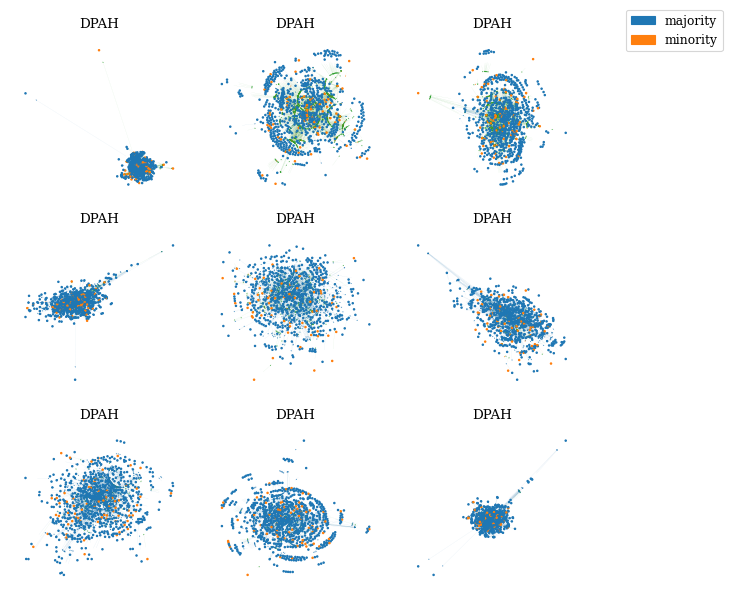

In [12]:
### Plotting al graphs at once
### Showing 3 graphs per row

fn = io.path_join(PLOTS, f'{EXID}_all_graphs.pdf')
viz.plot_graph(graph_models,
               nc = 3,
               cell_size = 2.0,
               wspace = 0.1,
               ignore_singletons=True,
               fn = fn)

plots/2_edge_types.pdf saved.


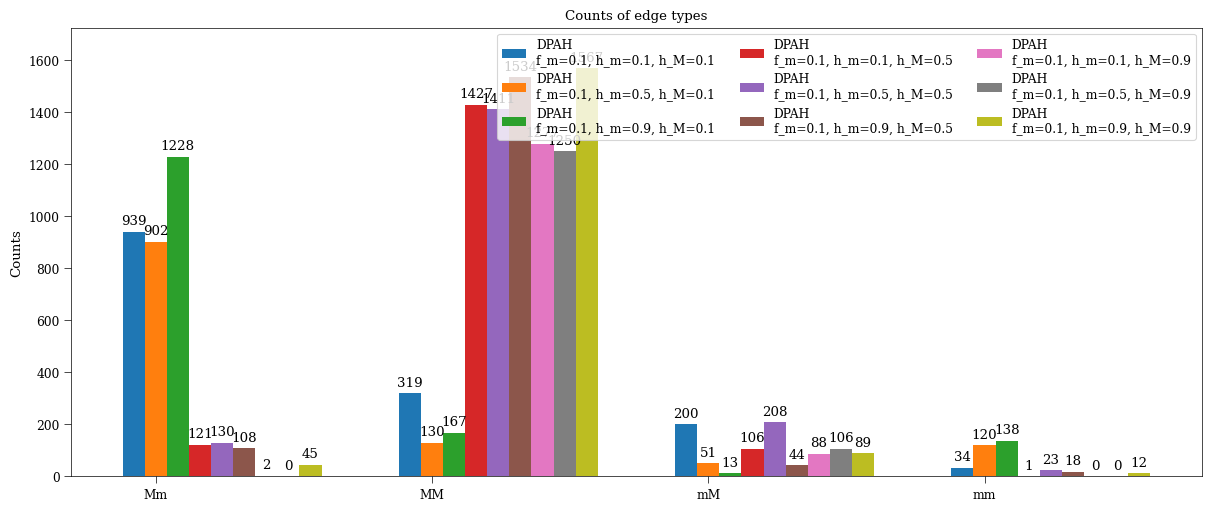

In [13]:
### Plot edge counts for each graph

fn = io.path_join(PLOTS, f'{EXID}_edge_types.pdf')
helper.plot_edge_type_counts(graph_models, 
                             figsize = (12,5),
                             width_bar = 0.08,
                             nc_legend = 3,
                             loc = 'best',
                             fn=fn)

In [14]:
metadata[0].head()

,node,class_label,real_label,degree,in_degree,out_degree,clustering,betweenness,closeness,eigenvector,pagerank,degree_rank,in_degree_rank,out_degree_rank,clustering_rank,betweenness_rank,closeness_rank,eigenvector_rank,pagerank_rank
0,0,0,M,NaN,2,3,0.555556,0.0,0.249646,3.319525e-02,0.000547,NaN,0.947368,0.892857,0.107143,1.0,0.774510,0.165525,0.895349
1,1,0,M,NaN,0,0,0.000000,0.0,0.000000,1.147827e-20,0.000248,NaN,1.000000,1.000000,1.000000,1.0,1.000000,0.576484,1.000000
2,2,0,M,NaN,0,3,0.333333,0.0,0.000000,-1.227646e-17,0.000248,NaN,1.000000,0.892857,0.446429,1.0,1.000000,0.950913,1.000000
3,3,0,M,NaN,1,1,0.500000,0.0,0.001001,-1.392217e-17,0.000249,NaN,0.973684,0.964286,0.148810,1.0,0.990196,0.987443,0.994186
4,4,0,M,NaN,0,0,0.000000,0.0,0.000000,1.559220e-18,0.000248,NaN,1.000000,1.000000,1.000000,1.0,1.000000,0.539954,1.000000


In [15]:
#### Set the metric of interest (network property of the node)
#### in_degree, out_degree, (degree for undirected), clustering, betweenness, etc. (see metadata)
metric = 'pagerank'

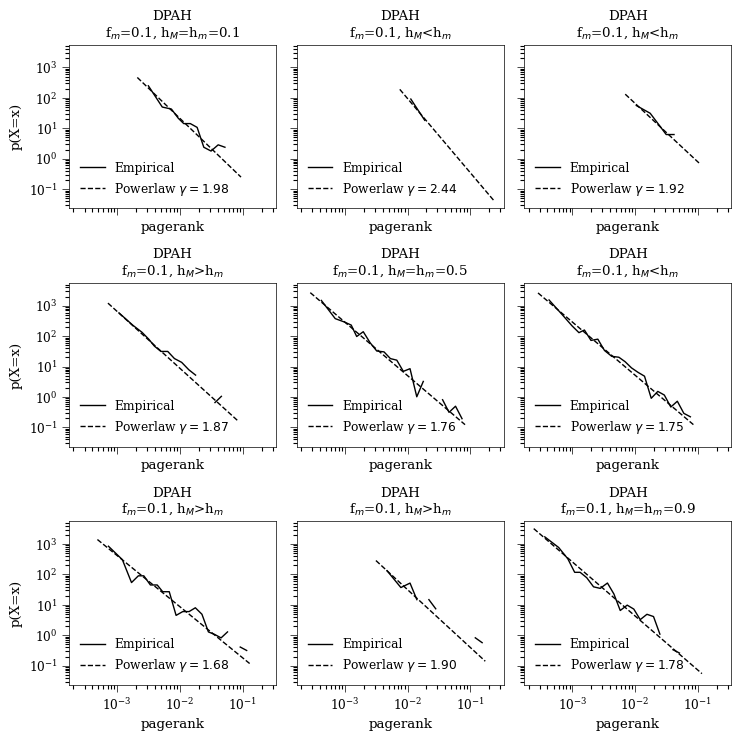

In [16]:
### Plot in_degree distribution of the whole graph
### Hint: Check out the dataframe. Which column has the in_degree of the node?

kind = 'pdf'

fn = io.path_join(PLOTS, f'{EXID}_{metric}_distribution.pdf')
viz.plot_powerlaw_fit(data = metadata,
                      col_name = metric,
                      kind = kind,
                      sharex = True, 
                      sharey = True,
                      cell_size = (2.5,2.5),
                      wspace = 0.1,
                      loc = 3,
                      nc = 3,
                      fn = fn)

/home/espinl/.conda/envs/py39snmaecmlpkdd24/lib/python3.9/site-packages/powerlaw.py:1184: RuntimeWarning: overflow encountered in power
  return x**-self.alpha
/home/espinl/.conda/envs/py39snmaecmlpkdd24/lib/python3.9/site-packages/powerlaw.py:835: RuntimeWarning: invalid value encountered in multiply
  likelihoods = f*C


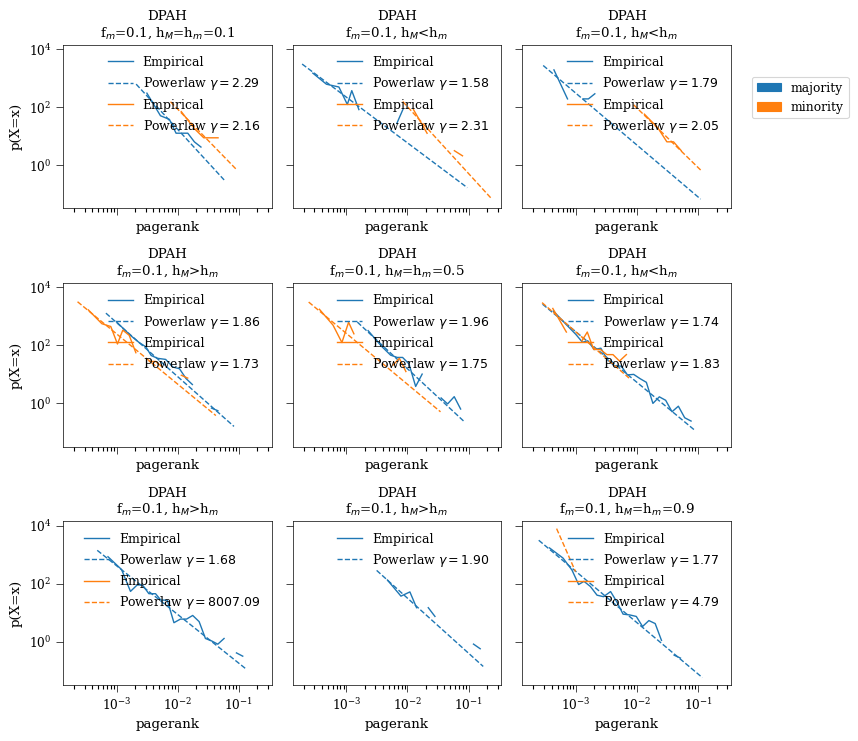

In [17]:
### Plot in_degree distribution of each group
### Hint: Check out the dataframe. Which column has the class of the node?
### M for majority, and m for minority.

hue = 'real_label'

fn = io.path_join(PLOTS, f'{EXID}_{metric}_distribution_by_{hue}.pdf')
viz.plot_powerlaw_fit(data = metadata,
                      col_name = metric,
                      kind = kind,
                      hue = hue,
                      sharex = True, 
                      sharey = True,
                      cell_size = (2.5,2.5),
                      wspace = 0.1,
                      loc = 1,
                      nc = 3,
                      fontsize = 9,
                      fn = fn)

## Task 4. Compute disparity scores

In [18]:
### smoothness to control for the smallest me (mean error: expected fm - observed fm)
beta = const.INEQUITY_BETA
beta

0.05

In [19]:
### Inspect the disparity scores (gini, and me) for each network

df_disparity = pd.DataFrame(columns=['model','params','inequality','inequity','inequity_class'])

for df in metadata:
    f_m = df.query("real_label == @const.MINORITY_LABEL").shape[0] / df.shape[0]
    
    inequity, inequality = distributions.get_disparity(df, metric)
    inequity_class = ranking.get_ranking_inequity_class(inequity, beta)
    
    model_name = df.name.replace('$_{','').replace('}$','')
    model_name, params = model_name.split('\n')
    tmp = pd.DataFrame({'model':model_name, 
                        'params':params, 
                        'inequality':inequality, 
                        'inequity':inequity, 
                        'inequity_class':inequity_class}, index=[0])
    
    df_disparity = pd.concat([df_disparity, tmp], ignore_index=True)

In [20]:
df_disparity

,model,params,inequality,inequity,inequity_class
0,DPAH,"fm=0.1, hM=hm=0.1",0.705975,0.271013,over-represented
1,DPAH,"fm=0.1, hM<hm",0.802376,0.529972,over-represented
2,DPAH,"fm=0.1, hM<hm",0.753825,0.535520,over-represented
3,DPAH,"fm=0.1, hM>hm",0.714541,0.012839,fair
4,DPAH,"fm=0.1, hM=hm=0.5",0.742366,0.003277,fair
5,DPAH,"fm=0.1, hM<hm",0.727727,-0.000647,fair
6,DPAH,"fm=0.1, hM>hm",0.786970,-0.084600,under-represented
7,DPAH,"fm=0.1, hM>hm",0.802900,-0.084600,under-represented
8,DPAH,"fm=0.1, hM=hm=0.9",0.754038,-0.073902,under-represented


## Task 5. Plot and compare

### Inequity: Minority fraction in top-k

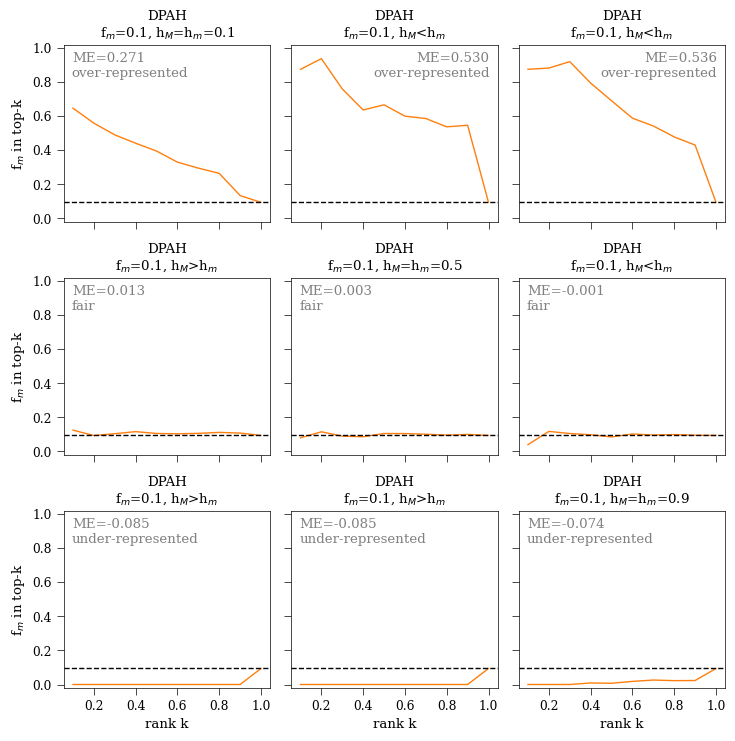

In [21]:
### Plot the inequity of the 'pagerank' distribution (ME: mean error)
### It shows the fraction of minoritiy nodes (y-axis) at each top-k rank (x-axis)
### Then, ME is computed as the difference between the fraction of minority nodes in each top-k 
### and the actual fraction of minorities.

fn = io.path_join(PLOTS, f'{EXID}_{metric}_inequity.pdf')

viz.plot_fraction_of_minority(metadata, 
                              col_name=metric, 
                              sharex=True, sharey=True,
                              cell_size = (2.5,2.5),
                              wspace = 0.1,
                              nc = 3,
                              fn = fn)

### Inequality: Gini coefficient of distribution

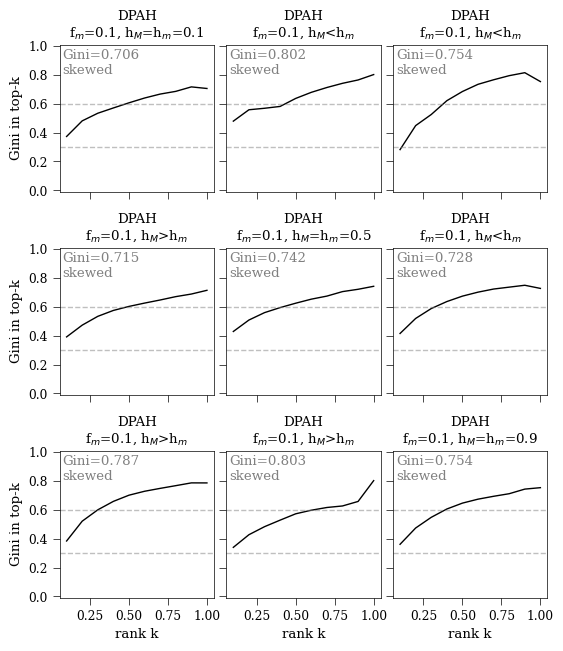

In [22]:
### Plot the inequality of the 'pagerank' distribution
### It shows the Gini coefficient in each top-k.
### Also, the global gini refers to the Gini at top-100% 

fn = io.path_join(PLOTS, f'{EXID}_{metric}_inequality.pdf')

viz.plot_gini_coefficient(metadata, 
                          col_name = metric, 
                          sharex = True, sharey = True,
                          nc = 3, 
                          wspace = 0.08, 
                          cell_size = (1.9,2.2),
                          fn = fn)

### Disparity: Inequality vs. Inequity

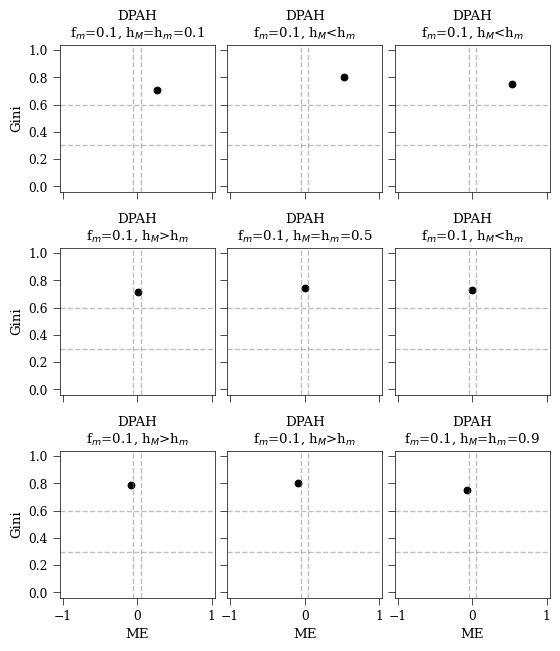

In [23]:
### Plot the disparity of the 'pagerank' distribution
### It shows the inequity (ME) vs. inequality (Gini)

fn = io.path_join(PLOTS, f'{EXID}_{metric}_disparity.pdf')

viz.plot_disparity(metadata, 
                   col_name = metric, 
                   sharex = True, sharey = True,
                   nc = 3, 
                   wspace = 0.08, 
                   cell_size = (1.9,2.2),
                   fn = fn)

## Bonus: Disentangling the effect of PA and H in ranking disparities

In [24]:
### Homopohily values to test
h_mm = 0.1
h_MM = 0.9
metadata_models_directed = []

### Graphs

## Only preferential attachment
m_dpa = DPAModel(N=N, d=d, f_m=f_m, plo_M=plo_M, plo_m=plo_m, seed=seed)
m_dpa.simulate()
md = networks.get_node_metadata_as_dataframe(m_dpa.graph) 
md.name = m_dpa.SHORT
metadata_models_directed.append(md)

## Only homophily
m_dh = DHModel(N=N, d=d, f_m=f_m, plo_M=plo_M, plo_m=plo_m, h_M=h_M, h_m=h_m, seed=seed)
m_dh.simulate()
md = networks.get_node_metadata_as_dataframe(m_dh.graph) 
md.name = m_dh.SHORT
metadata_models_directed.append(md)

## Both, preferential attachment and homophily
m_dpah = DPAHModel(N=N, d=d, f_m=f_m, plo_M=plo_M, plo_m=plo_m, h_M=h_M, h_m=h_m, seed=seed)
m_dpah.simulate()
md = networks.get_node_metadata_as_dataframe(m_dpah.graph) 
md.name = m_dpah.SHORT
metadata_models_directed.append(md)


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

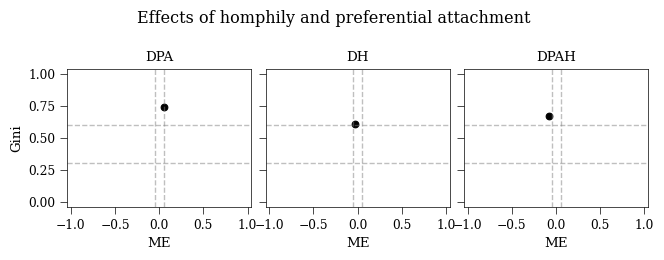

In [25]:
### Visualize
fn = io.path_join(PLOTS, f'{EXID}_{metric}_disparity_DPA_DH_DPAH.pdf')
viz.plot_disparity(metadata_models_directed, 
                   col_name = metric, 
                   sharex = True, sharey = True,
                   nc = 3, 
                   wspace = 0.08, 
                   cell_size = (2.2,2.6),
                   suptitle = "Effects of homphily and preferential attachment",
                   fn = fn)

## Bonus: Disentangling the effect of directed links

In [26]:
### Undirected networks
from netin.models import PAModel
from netin.models import HomophilyModel
from netin.models import PAHModel

In [27]:

### Add graphs (similar as the ones above) but without directed links
m = 2
metadata_models_undirected = []

## Only preferential attachment
m_pa = PAModel(N=N, m=m, f_m=f_m, seed=seed)
m_pa.simulate()
md = networks.get_node_metadata_as_dataframe(m_pa.graph) 
md.name = m_pa.SHORT
metadata_models_undirected.append(md)

## Only homophily
m_h = HomophilyModel(N=N, m=m, f_m=f_m, h_M=h_M, h_m=h_m, seed=seed)
m_h.simulate()
md = networks.get_node_metadata_as_dataframe(m_h.graph) 
md.name = m_h.SHORT
metadata_models_undirected.append(md)

## Both, preferential attachment and homophily
m_pah = PAHModel(N=N, m=m, f_m=f_m, h_M=h_M, h_m=h_m, seed=seed)
m_pah.simulate()
md = networks.get_node_metadata_as_dataframe(m_pah.graph) 
md.name = m_pah.SHORT
metadata_models_undirected.append(md)


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

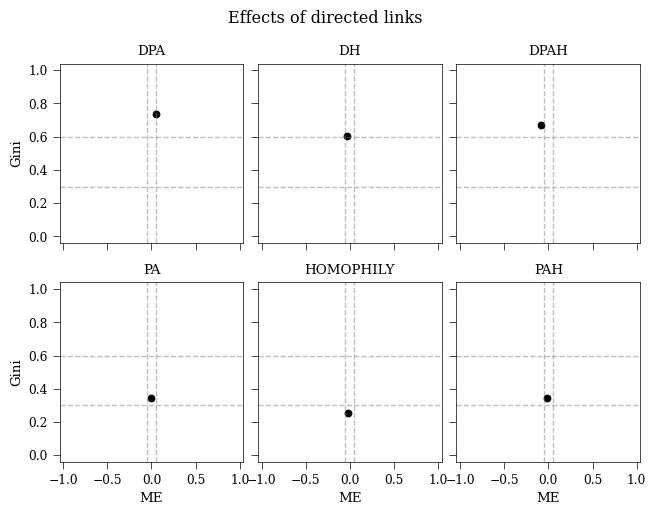

In [28]:
### Visualize
fn = io.path_join(PLOTS, f'{EXID}_{metric}_disparity_directed_vs_undirected.pdf')
viz.plot_disparity(metadata_models_directed + metadata_models_undirected, 
                   col_name = metric, 
                   sharex = True, sharey = True,
                   nc = 3, 
                   wspace = 0.08, 
                   cell_size = (2.2,2.6),
                   suptitle = "Effects of directed links",
                   fn = fn)